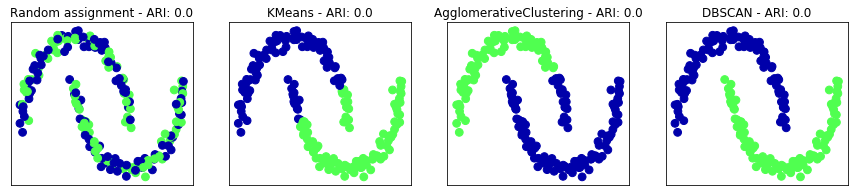

In [12]:
# クラスタリングアルゴリズムの問題点は、分類結果の評価が難しいことである
# 正解データを用いたクラスタリングの評価
# 正解データクラスタリングと皮下ｋして評価するために用いられる指標で、最も重要なのが、調整ランド指数と正規化相互情報量である

from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データ平均を0、分散を1にスケールする
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

# 利用するアルゴリズムのリストを作成する
algorithm = [KMeans(n_clusters=2),  AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 参照のためにランダムなクラスタを割り当てを作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# ランダムな割当をプロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f"Random assignment - ARI: {round(adjusted_rand_score(y, random_clusters), 2)}")

for ax , algorithm in zip(axes[1:], algorithm):
    # クラスタ割当とクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {round(adjusted_rand_score(y, random_clusters), 2)}")
# クラスタリングを評価する上でよくある間違いは、adjusted_rand_scoreやnormalized_mutual_info_scoreでなく
# accuracy_scoreで評価してしまうことである。accuracy_scoreはクラスタラベルが正解データに完全一致していることが要求される
# しかしクラスタラベル自体に意味はなく、あるクラスタにどのデータポイントが含まれるかが大事である

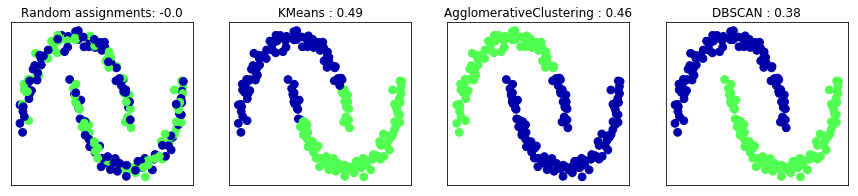

In [13]:
# 正解データを用いないクラスタリングの評価
# 実際にはARIのような指標を用いるには問題がある。
# クラスタリングアルゴリズムを使う場合、実際には結果と比較するための正解データが存在しない場合が多い。
# 正しいデータのクラスタリングがわかっているなら、それを使って、クラス分類器のような教師あり藻ですを作れば良い。

# 正解データを使用しない指標として、シルエット係数がある
# しかし、シルエット係数はうまくいかない。これはクラスタのコンパクトさを計算するため、複雑な形状のクラスタはコンパクトにできない
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f"Random assignments: {round(silhouette_score(X_scaled, random_clusters), 2)}")

algorithm = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 直感的に合致するDBSCAのスコアがkmeansよりも劣っている
for ax, algorithm in zip(axes[1:], algorithm):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__} : {round(silhouette_score(X_scaled, clusters), 2)}")

In [ ]:
# もう少し良い評価方法として、「頑健性を用いた」クラスタリング指標がある